# studying the distribution of returns of NIFTY indices

In [2]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

indices <- Indices()
indexName <- "NIFTY 50 TR"

In [3]:
trIndex <- data.frame(indices$NseTimeSeries() %>%
    filter(NAME == indexName) %>%
    select(TIME_STAMP, CLOSE)) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

trXts <- xts(trIndex$CLOSE, trIndex$TIME_STAMP)
monthlyTrReturns <- monthlyReturn(trXts)

#ignore the first and last months
monthlyTrReturns <- monthlyTrReturns[-1]
monthlyTrReturns <- monthlyTrReturns[-nrow(monthlyTrReturns)]

monthlyTrReturns <- monthlyTrReturns * 100

In [4]:
# statistical summary of returns
print(summary(monthlyTrReturns))

     Index            monthly.returns  
 Min.   :1999-07-30   Min.   :-26.369  
 1st Qu.:2004-08-07   1st Qu.: -2.497  
 Median :2009-08-15   Median :  1.345  
 Mean   :2009-08-14   Mean   :  1.258  
 3rd Qu.:2014-08-21   3rd Qu.:  5.521  
 Max.   :2019-08-30   Max.   : 28.084  


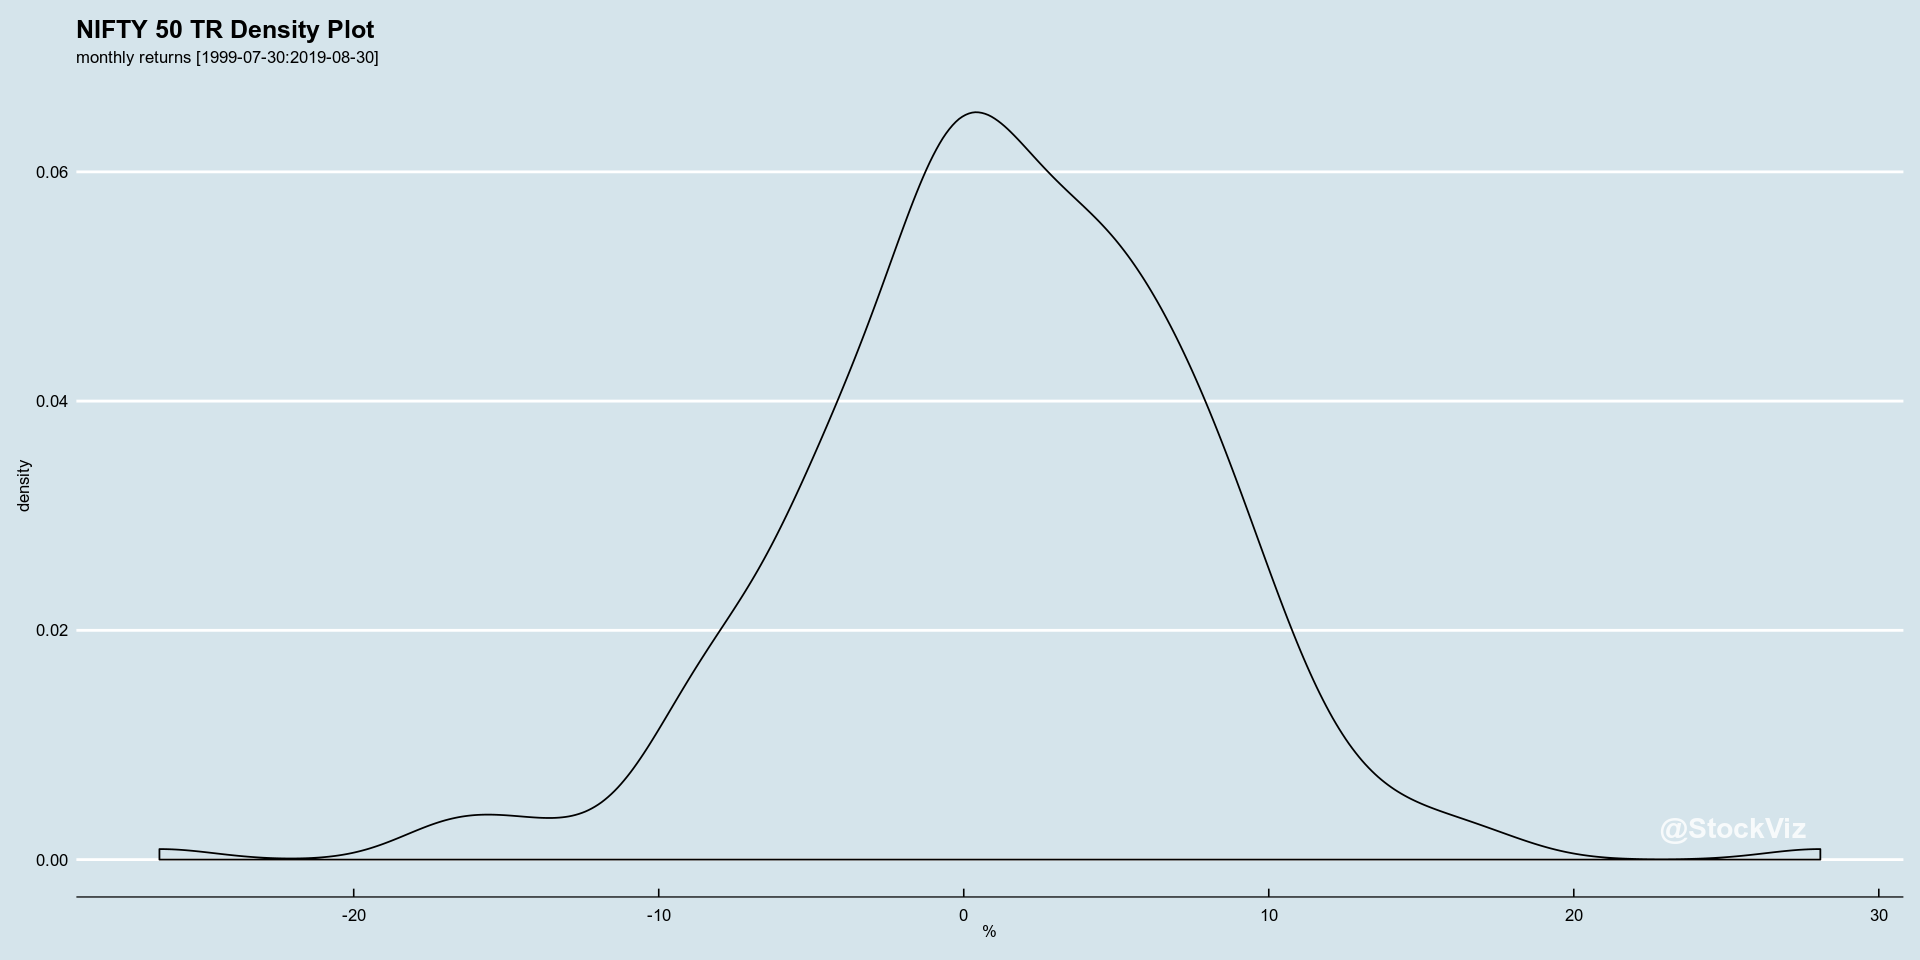

In [5]:
firstDate <- first(index(monthlyTrReturns))
lastDate <- last(index(monthlyTrReturns))
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

mRetDf <- data.frame(monthlyTrReturns)
names(mRetDf) <- c('R')

mRetDf$T <- index(monthlyTrReturns)

ggplot(mRetDf, aes(x=R)) +
    theme_economist() +
    geom_density() +
    labs(x='%', y='density', color='', title=sprintf("%s Density Plot", indexName), 
         subtitle=sprintf("monthly returns [%s:%s]", firstDate, lastDate)) +
    annotate("text", x=max(monthlyTrReturns), y=0, label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)

### super-impose a normal distribution with the same mean and standard-deviation

what are these "fat-tails" that people keep talking about?

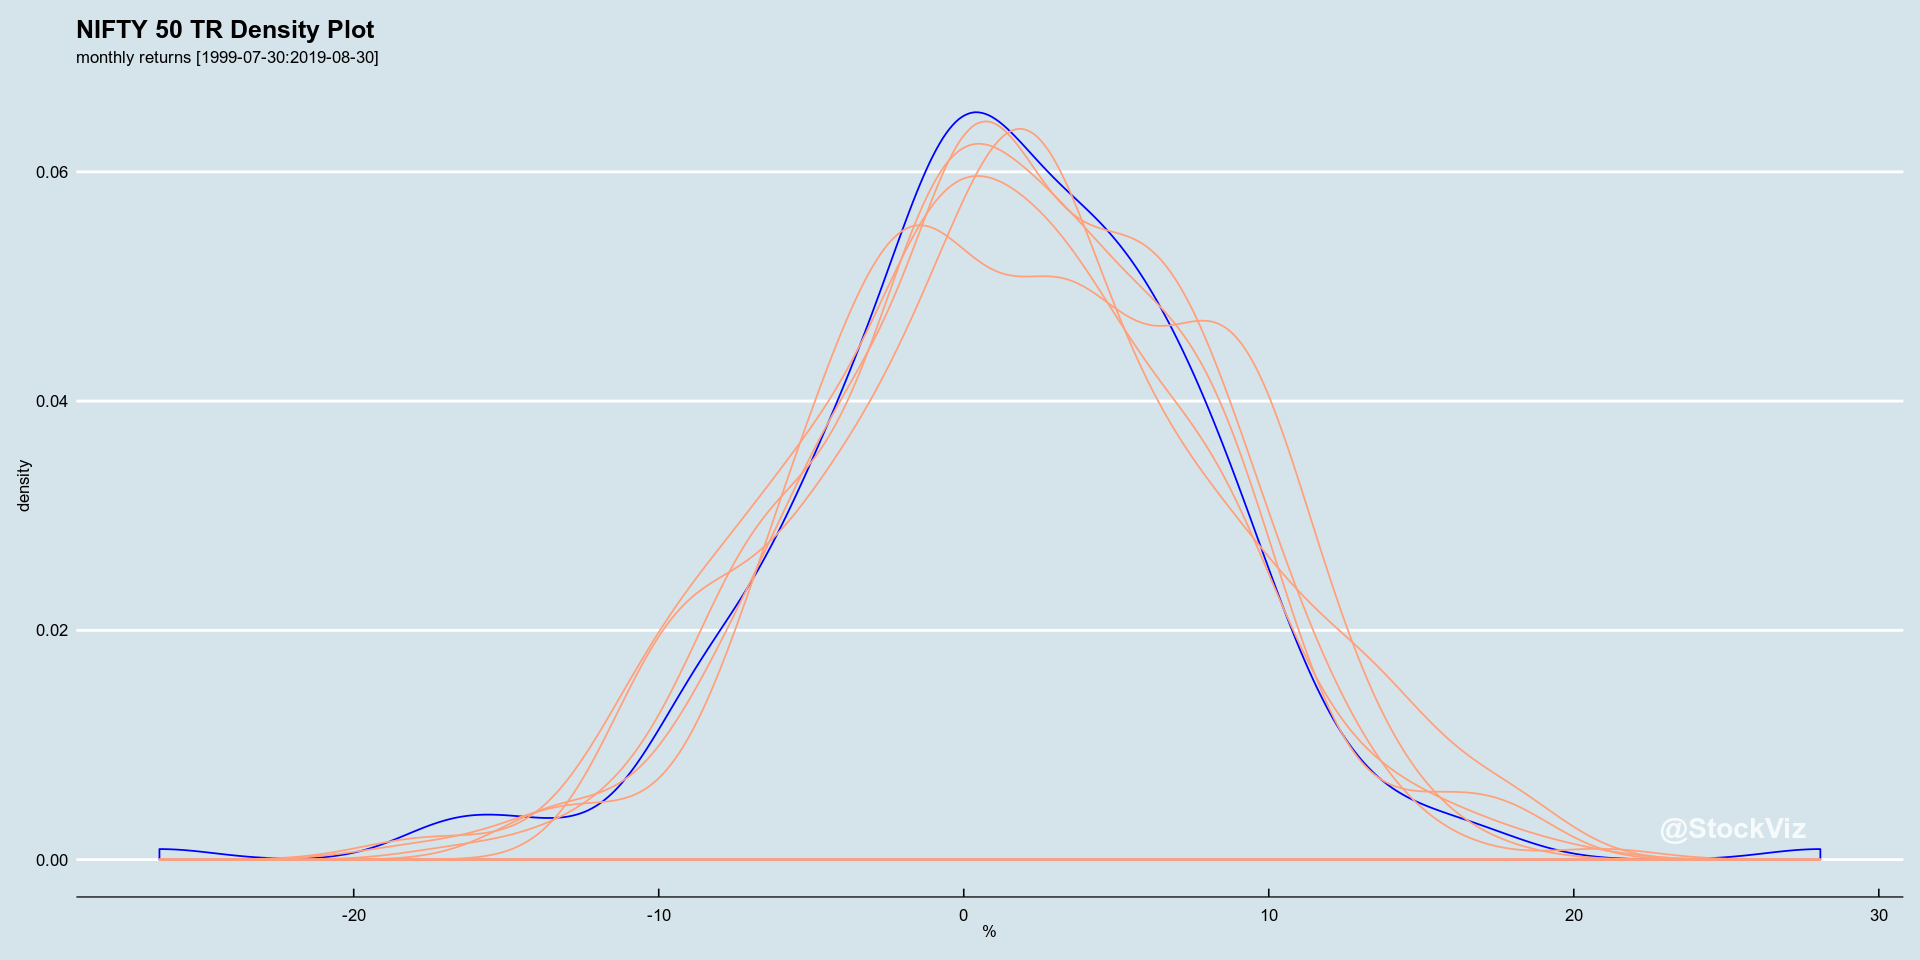

In [6]:
avg <- mean(coredata(monthlyTrReturns))
stddev <- sd(coredata(monthlyTrReturns))

mRetDf$N1 <- rnorm(nrow(monthlyTrReturns), mean=avg, sd=stddev)
mRetDf$N2 <- rnorm(nrow(monthlyTrReturns), mean=avg, sd=stddev)
mRetDf$N3 <- rnorm(nrow(monthlyTrReturns), mean=avg, sd=stddev)
mRetDf$N4 <- rnorm(nrow(monthlyTrReturns), mean=avg, sd=stddev)
mRetDf$N5 <- rnorm(nrow(monthlyTrReturns), mean=avg, sd=stddev)

ggplot(mRetDf) +
    theme_economist() +
    geom_density(aes(x = R), color='blue') +
    geom_density(aes(x = N1), color='lightsalmon') +
    geom_density(aes(x = N2), color='lightsalmon') +
    geom_density(aes(x = N3), color='lightsalmon') +
    geom_density(aes(x = N4), color='lightsalmon') +
    geom_density(aes(x = N5), color='lightsalmon') +
    labs(x='%', y='density', color='', title=sprintf("%s Density Plot", indexName), 
         subtitle=sprintf("monthly returns [%s:%s]", firstDate, lastDate)) +
    annotate("text", x=max(monthlyTrReturns), y=0, label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)


### take-away

Even though it sounds smart to say "you cannot model equity returns because they have fat-tails" it doesn't really further the science. As can be seen above, even a "normal" random process can generate weired looking distributions. It is only when you increase the number of trials and aggretate them, that you get the text-book look.

So, don't let the tail wag the dog.

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)